In [11]:
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import io

In [3]:
pbmc1 = sc.read_h5ad('/home/jmitchel/data/covid_data/COVID19_ALL.h5ad')

In [47]:
# checking quality metrics
pbmc1.var['mt'] = pbmc1.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(pbmc1, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

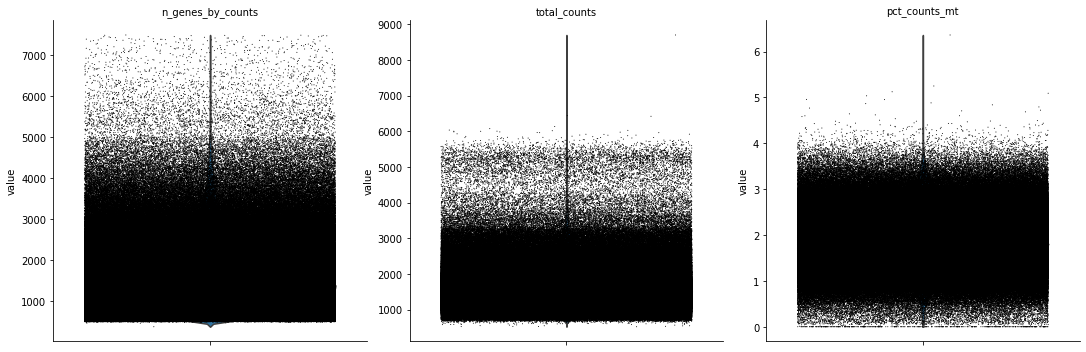

In [10]:
sc.pl.violin(pbmc1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [48]:
max(pbmc1.obs.pct_counts_mt)

6.361462116241455

In [17]:
## looks okay in terms of QC metrics, though there are probably some doublets

In [28]:
# len(set(pbmc1.obs.sampleID)) #284 samples as expected
# len(set(pbmc1.obs.PatientID)) #196 individuals as expected (some individuals have > 1 sample)


AACAGGGGTCGGATTT-0    S-S070-1
AACCAACGTCCGAAAG-0    S-S070-1
AACCTTTGTAGCACGA-0    S-S070-1
AAGCATCTCTATCGCC-0    S-S070-1
AATCACGGTCATAAAG-0    S-S070-1
AATCACGGTGGTTCTA-0    S-S070-1
AATGAAGCAACTGGTT-0    S-S070-1
AATGAAGCACCAGCGT-0    S-S070-1
AATGCCATCACCTCGT-0    S-S070-1
AATGGCTCAAGGCTTT-0    S-S070-1
Name: sampleID, dtype: category
Categories (284, object): ['S-HC001', 'S-HC002', 'S-HC003', 'S-HC004', ..., 'S-S090-1', 'S-S090-2', 'S-S091', 'S-S092']

In [49]:
# checking what different metadata fields are available
pbmc1

AnnData object with n_obs × n_vars = 1462702 × 27943
    obs: 'celltype', 'majorType', 'sampleID', 'PatientID', 'datasets', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'har_emb'
    obsp: 'connectivities', 'distances'

In [50]:
## looking at the cell type annotations
# set(pbmc1.obs.majorType)
set(pbmc1.obs['Sample type'])

{'B cells sorted from frozen PBMC (MACS, STEMCELL 19054)',
 'CD19+ B cell sorted from fresh PBMC (FACS)',
 'CD19+ B cell sorted from fresh PBMC (MACS)',
 'CD3+ T cell and CD19+ B cell sorted from fresh PBMC (FACS)',
 'CD3+ T cell sorted from fresh PBMC (FACS)',
 'fresh BALF',
 'fresh PBMC',
 'fresh PFMC',
 'fresh Sputum',
 'frozen PBMC'}

In [51]:
## subset to only include cells of non-isolated fresh PBMC's
m1 = pbmc1.obs['Sample type'] == 'fresh PBMC' 
m2 = pbmc1.obs['Sample type'] == 'frozen PBMC' 
m3 = m1 | m2
print(m1[:10])
print(m2[:10])
print(m3[:10])

pbmc2 = pbmc1[m3, :]


AACAGGGGTCGGATTT-0    False
AACCAACGTCCGAAAG-0    False
AACCTTTGTAGCACGA-0    False
AAGCATCTCTATCGCC-0    False
AATCACGGTCATAAAG-0    False
AATCACGGTGGTTCTA-0    False
AATGAAGCAACTGGTT-0    False
AATGAAGCACCAGCGT-0    False
AATGCCATCACCTCGT-0    False
AATGGCTCAAGGCTTT-0    False
Name: Sample type, dtype: bool
AACAGGGGTCGGATTT-0    True
AACCAACGTCCGAAAG-0    True
AACCTTTGTAGCACGA-0    True
AAGCATCTCTATCGCC-0    True
AATCACGGTCATAAAG-0    True
AATCACGGTGGTTCTA-0    True
AATGAAGCAACTGGTT-0    True
AATGAAGCACCAGCGT-0    True
AATGCCATCACCTCGT-0    True
AATGGCTCAAGGCTTT-0    True
Name: Sample type, dtype: bool
AACAGGGGTCGGATTT-0    True
AACCAACGTCCGAAAG-0    True
AACCTTTGTAGCACGA-0    True
AAGCATCTCTATCGCC-0    True
AATCACGGTCATAAAG-0    True
AATCACGGTGGTTCTA-0    True
AATGAAGCAACTGGTT-0    True
AATGAAGCACCAGCGT-0    True
AATGCCATCACCTCGT-0    True
AATGGCTCAAGGCTTT-0    True
Name: Sample type, dtype: bool


In [52]:
pbmc2 # left with 542075 cells when only fresh pbmcs... 993171 when include both fresh and frozen

View of AnnData object with n_obs × n_vars = 993171 × 27943
    obs: 'celltype', 'majorType', 'sampleID', 'PatientID', 'datasets', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'har_emb'
    obsp: 'connectivities', 'distances'

In [53]:
print(len(set(pbmc2.obs.sampleID))) #83 samples left with just fresh pbmc ... 172 when include frozen
print(len(set(pbmc2.obs.PatientID))) #79 individuals left with just fresh pbmc ... 151 when include frozen

172
151


In [61]:
# seeing if the patients with multiple samples have like two progression samples or one progression one conv
all_donors = set(pbmc2.obs.PatientID)
samp_keep = [] # store samples to keep
for d in all_donors:
    tmp = pbmc2[pbmc2.obs.PatientID==d,]
    samp_keep.append(list(set(tmp.obs.sampleID))[0]) #arbitrarily select the first sample to keep for analysis
#     print(d)
#     print(len(set(tmp.obs.sampleID)))
#     print(set(tmp.obs['Sample time']))
#     print('')

In [63]:
print(len(samp_keep))
samp_keep[:10]

151


['S-S083',
 'S-M046',
 'S-M006',
 'S-S015',
 'S-M054',
 'S-S033',
 'S-S037',
 'S-M067',
 'S-S041',
 'S-S040']

In [75]:
# subset data to just selected samples so that each donor only has one
samp_mask = [True if x in samp_keep else False for x in pbmc2.obs.sampleID]
pbmc3 = pbmc2[samp_mask, :]


In [78]:
pbmc3


View of AnnData object with n_obs × n_vars = 945817 × 27943
    obs: 'celltype', 'majorType', 'sampleID', 'PatientID', 'datasets', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'har_emb'
    obsp: 'connectivities', 'distances'

In [77]:
# double checking we only have one sample per donor
all_donors = set(pbmc3.obs.PatientID)
for d in all_donors:
    tmp = pbmc3[pbmc3.obs.PatientID==d,]
    print(d)
    print(len(set(tmp.obs.sampleID)))
    print(set(tmp.obs['Sample time']))
    print('')

P-S083
1
{'convalescence'}

P-M046
1
{'progression'}

P-M006
1
{'convalescence'}

P-S015
1
{'convalescence'}

P-M054
1
{'convalescence'}

P-S033
1
{'convalescence'}

P-S037
1
{'progression'}

P-M067
1
{'progression'}

P-S041
1
{'progression'}

P-S040
1
{'progression'}

P-S057
1
{'progression'}

P-M073
1
{'convalescence'}

P-S032
1
{'progression'}

P-M026
1
{'convalescence'}

P-M037
1
{'convalescence'}

P-M045
1
{'convalescence'}

P-HC005
1
{'control'}

P-S088
1
{'progression'}

P-S017
1
{'convalescence'}

P-M077
1
{'progression'}

P-S048
1
{'progression'}

P-S050
1
{'progression'}

P-M019
1
{'convalescence'}

P-M079
1
{'progression'}

P-M022
1
{'convalescence'}

P-HC015
1
{'control'}

P-S085
1
{'progression'}

P-M043
1
{'convalescence'}

P-M024
1
{'convalescence'}

P-S044
1
{'progression'}

P-S067
1
{'convalescence'}

P-S056
1
{'progression'}

P-S081
1
{'convalescence'}

P-S080
1
{'convalescence'}

P-S053
1
{'progression'}

P-HC009
1
{'control'}

P-S039
1
{'progression'}

P-S071
1
{'pr

In [3]:
pbmc3.write('/home/jmitchel/data/covid_data/COVID19_subset.h5ad')

NameError: name 'pbmc3' is not defined

In [81]:
## trying to downgrade anndata to see if it fixes the error in seurat with R
!pip install anndata==0.6.22.post1

     |████████████████████████████████| 47 kB 3.2 MB/s eta 0:00:011
  Attempting uninstall: anndata
    Found existing installation: anndata 0.7.6
    Uninstalling anndata-0.7.6:
      Successfully uninstalled anndata-0.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.8.1 requires anndata>=0.7.4, but you have anndata 0.6.22.post1 which is incompatible.


In [86]:
## trying to save as loom file, then downgrade h5py then load loom and export the h5 file again
pbmc3.write_loom('/home/jmitchel/data/covid_data/COVID19_subset.loom')

The loom file will lack these fields:
{'har_emb', 'X_tsne', 'X_pca'}
Use write_obsm_varm=True to export multi-dimensional annotations


KeyError: 'Attribute name cannot contain slash (/)'

In [12]:
# restarted kernel.. will reload data and try to resave it...
pbmc3 = sc.read_h5ad('/home/jmitchel/data/covid_data/COVID19_subset.h5ad')

In [ ]:
## check that the "raw" elements are the same dimensions as the full elements
## if not, then can subset them too and try again
## if they are correct, I can try exporting just the raw data as matrices
## for this i'd need to see what format the raw matrix is in...

# print(pbmc3.raw.X[0:100,0:10])
# print(pbmc3.X[0:10,0:10])
# pbmc3.X.shape
# pbmc3.raw.X.shape
# print(sum(pbmc3.raw.X==0))

In [15]:
# trying to export anndata as csvs though this is probably a terrible idea
print(9)

9


In [20]:
scipy.io.mmwrite('/home/jmitchel/data/covid_data/COVID19_subset.mtx', pbmc3.raw.X)

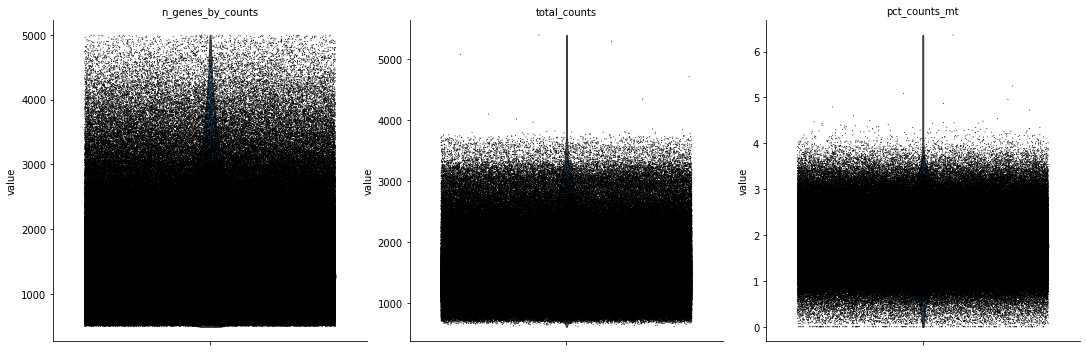

In [21]:
sc.pl.violin(pbmc3, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [22]:
max(pbmc3.obs.total_counts)

5401.55908203125

In [24]:
pbmc3.obs.total_counts[0]

AttributeError: 'Raw' object has no attribute 'obs'

In [25]:
tmp = pd.DataFrame(pbmc3.raw.X)


In [26]:
lib_sizes = tmp.sum(axis=0)

In [37]:
lib_sizes[:10]

0      (0, 14946)\t11.0\n  (0, 2693)\t2.0\n  (0, 61...
dtype: object

In [38]:
tmp.shape

(945817, 1)

In [53]:
# import numpy
test=pbmc3.raw.X[0,:].todense()

In [57]:
test.sum()

3985.0

(945817, 27943)

In [14]:
from scipy.sparse import csr_matrix
test = csr_matrix(pbmc3.raw.X)

In [26]:
lib_sizes = test.sum(axis=1)

matrix([[ 162742.,   13124.,    3699., ...,  105293., 1080934.,  166689.]],
       dtype=float32)

In [27]:
lib_sizes[0,0]

3985.0

In [28]:
lib_sizes.shape

(945817, 1)

In [29]:
meta_df = pd.DataFrame(pbmc3.obs)

In [31]:
meta_df.to_csv('/home/jmitchel/data/covid_data/COVID19_meta.csv')


In [33]:
# saving gene names
genes = pd.DataFrame(pbmc3.raw.var_names)

In [35]:
genes.to_csv('/home/jmitchel/data/covid_data/COVID19_genes.csv')